In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from IPython.display import FileLink
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/sparsh/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
TrainDataPath = './data/train.csv'
TestDataPath = './data/test.csv'

# Loading the Training and Test Dataset
TrainData = pd.read_csv(TrainDataPath)
TestData = pd.read_csv(TestDataPath)

In [3]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(TrainData.dtypes)
TrainData.head()

Training Dataset Shape:
(108129, 14)


Training Dataset Columns/Features:
project_id                object
name                      object
desc                      object
goal                     float64
keywords                  object
disable_communication       bool
country                   object
currency                  object
deadline                   int64
state_changed_at           int64
created_at                 int64
launched_at                int64
backers_count              int64
final_status               int64
dtype: object


,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [4]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(TestData.dtypes)
TestData.head()

Test Dataset Shape:
(63465, 12)


Test Dataset Columns/Features:
project_id                object
name                      object
desc                      object
goal                     float64
keywords                  object
disable_communication       bool
country                   object
currency                  object
deadline                   int64
state_changed_at           int64
created_at                 int64
launched_at                int64
dtype: object


,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890


In [5]:
# Now Checking For Any Missing Values
print("Training Dataset Missing Value Columns:")
print(TrainData.isnull().sum())
print("\n")
print("Test Dataset Missing Value Columns:")
print(TestData.isnull().sum())

Training Dataset Missing Value Columns:
project_id               0
name                     1
desc                     8
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64


Test Dataset Missing Value Columns:
project_id               0
name                     0
desc                     4
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
dtype: int64


In [6]:
# From this I will get to know what are different categories of type, pf_category and currency
print("Different type in train and test dataset: ")
print(TrainData['country'].unique())
print(TestData['country'].unique())
print("\n")
print("Different pf_categories in train and test dataset: ")
print(TrainData['currency'].unique())
print(TestData['currency'].unique())

Different type in train and test dataset: 
['US' 'GB' 'CA' 'AU' 'NZ' 'NL' 'SE' 'IE' 'NO' 'DK' 'DE']
['US' 'IT' 'GB' 'AU' 'NO' 'NL' 'SE' 'ES' 'DK' 'CA' 'DE' 'IE' 'FR' 'NZ' 'CH'
 'BE' 'AT' 'LU' 'HK' 'SG' 'MX']


Different pf_categories in train and test dataset: 
['USD' 'GBP' 'CAD' 'AUD' 'NZD' 'EUR' 'SEK' 'NOK' 'DKK']
['USD' 'EUR' 'GBP' 'AUD' 'NOK' 'SEK' 'DKK' 'CAD' 'NZD' 'CHF' 'HKD' 'SGD'
 'MXN']


In [7]:
# From this I will get to know what are different categories of type, pf_category and currency
print("Different country in train and test dataset: ")
print(TrainData['country'].nunique())
print(TestData['country'].nunique())
print("\n")
print("Different currency in train and test dataset: ")
print(TrainData['currency'].nunique())
print(TestData['currency'].nunique())

Different country in train and test dataset: 
11
21


Different currency in train and test dataset: 
9
13


**From above we find out that test has more categories in country and currency features than the train dataset**

# VISUALIZATION OF DATASET

Number of 0's(Unsuccessful) :  73568
Number of 1's(Successful)   :  34561


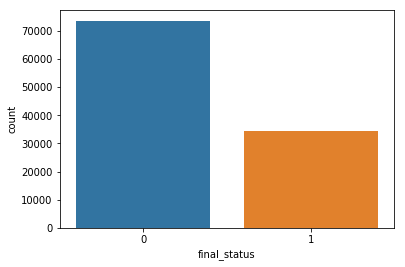

In [8]:
ax = sns.countplot(TrainData['final_status'],label="Count")
B, M = TrainData['final_status'].value_counts()
print('Number of 0\'s(Unsuccessful) : ',B)
print('Number of 1\'s(Successful)   : ',M) 

Number of False :  107806
Number of True  :  323


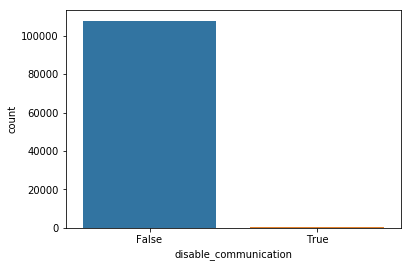

In [9]:
ax = sns.countplot(TrainData['disable_communication'],label="Count")
B, M = TrainData['disable_communication'].value_counts()
print('Number of False : ',B)
print('Number of True  : ',M) 

Number of False :  63119
Number of True  :  346


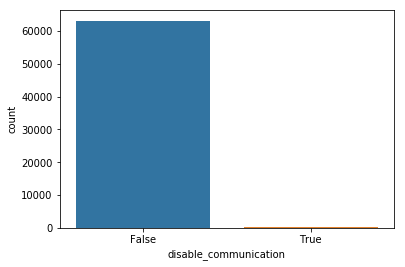

In [10]:
ax = sns.countplot(TestData['disable_communication'],label="Count")
B, M = TestData['disable_communication'].value_counts()
print('Number of False : ',B)
print('Number of True  : ',M) 

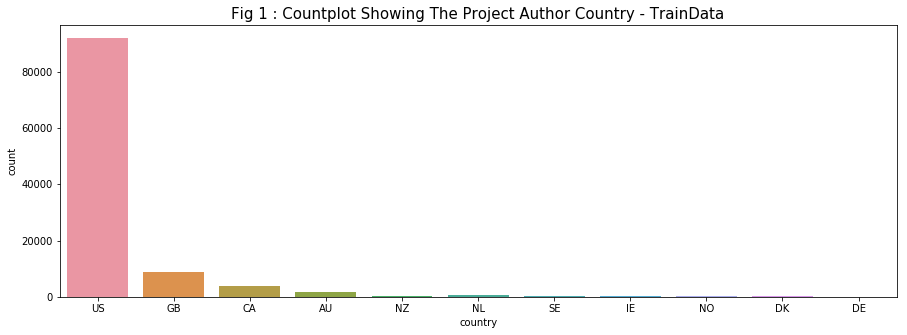

In [11]:
# Visualiza the data
plt.figure(figsize= (15,5))
sns.countplot(x = TrainData['country'])
plt.title('Fig 1 : Countplot Showing The Project Author Country - TrainData', fontsize = 15)

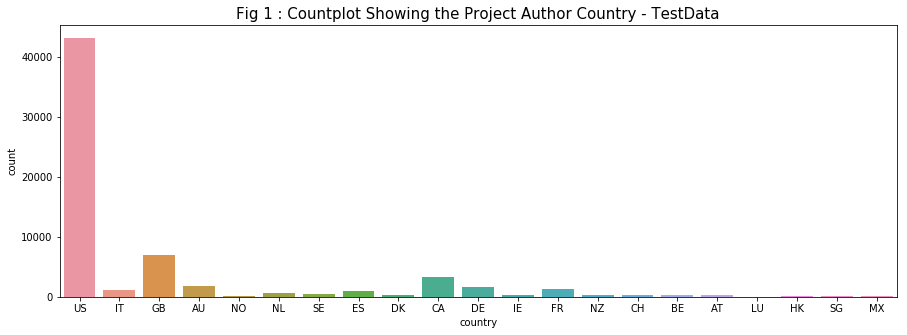

In [12]:
# Visualiza the data
plt.figure(figsize= (15,5))
sns.countplot(x = TestData['country'])
plt.title('Fig 1 : Countplot Showing the Project Author Country - TestData', fontsize = 15)

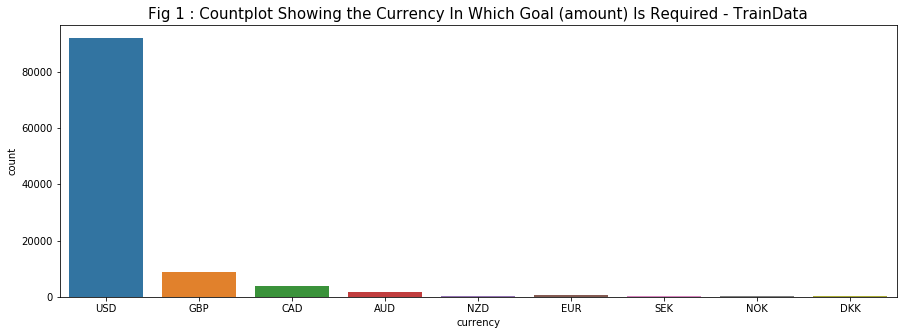

In [13]:
# Visualiza the data
plt.figure(figsize= (15,5))
sns.countplot(x = TrainData['currency'])
plt.title('Fig 1 : Countplot Showing the Currency In Which Goal (amount) Is Required - TrainData', fontsize = 15)

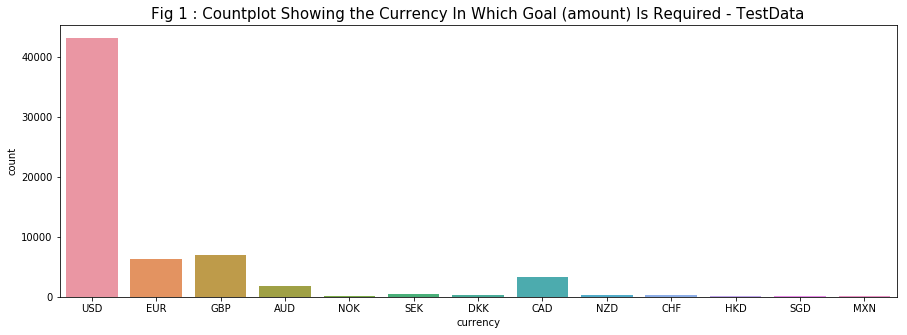

In [14]:
# Visualiza the data
plt.figure(figsize= (15,5))
sns.countplot(x = TestData['currency'])
plt.title('Fig 1 : Countplot Showing the Currency In Which Goal (amount) Is Required - TestData', fontsize = 15)

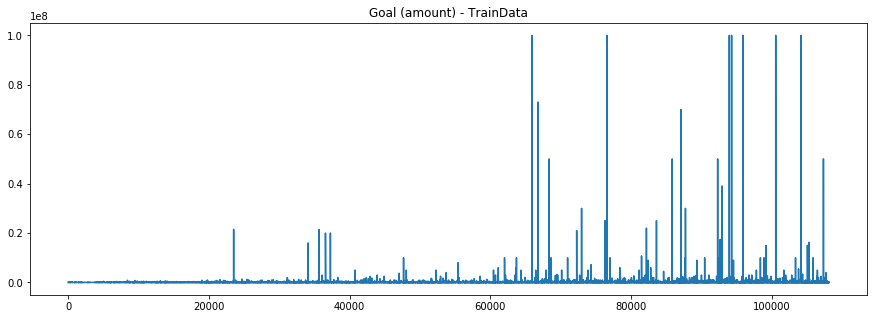

In [15]:
plt.figure(figsize= (15,5))
plt.plot(TrainData['goal'])
plt.title('Goal (amount) - TrainData')

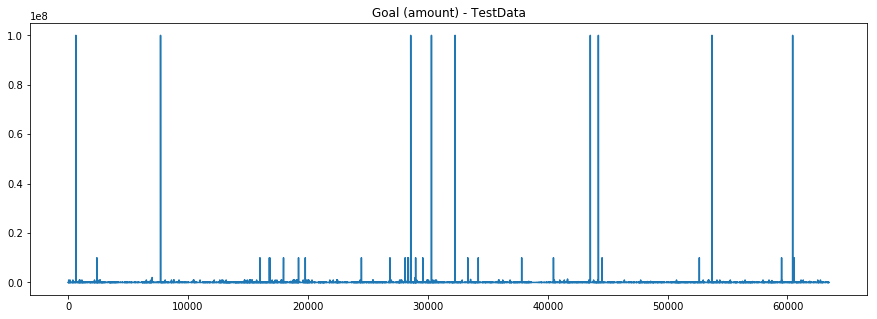

In [16]:
plt.figure(figsize= (15,5))
plt.plot(TestData['goal'])
plt.title('Goal (amount) - TestData')

# Datetime Conversion In Dataset

In [17]:
TrainData['deadline'].head()

0    1241333999
1    1242429000
2    1243027560
3    1243555740
4    1243769880
Name: deadline, dtype: int64

In [18]:
# Unit = 's' is used when we are dealing with unix timestamp as this is epoch time stamp
print(pd.to_datetime(TrainData['deadline'],unit='s').head())
print()
print(pd.to_datetime(TrainData['deadline'],unit='s').tail())

0   2009-05-03 06:59:59
1   2009-05-15 23:10:00
2   2009-05-22 21:26:00
3   2009-05-29 00:09:00
4   2009-05-31 11:38:00
Name: deadline, dtype: datetime64[ns]

108124   2015-05-31 18:07:31
108125   2015-05-31 18:14:00
108126   2015-05-31 18:18:54
108127   2015-05-31 18:23:00
108128   2015-05-31 18:28:58
Name: deadline, dtype: datetime64[ns]


**We can observe that training data is from May 2009 till May 2015**

In [19]:
# Convert columns to datetime in both Training and Test Set
for i in ['deadline','state_changed_at', 'created_at','launched_at']:
    TrainData[i] = pd.to_datetime(TrainData[i],unit='s')
    TestData[i] = pd.to_datetime(TestData[i],unit='s')

In [20]:
TrainData.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0


In [21]:
TestData.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,2015-12-08 23:59:45,2015-12-08 23:59:45,2015-10-28 03:23:01,2015-10-29 22:59:45
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,2016-01-22 04:07:00,2016-01-22 04:07:00,2015-12-16 20:22:03,2015-12-18 04:07:00


In [22]:
print(TrainData['keywords'].nunique()) # Equal to shape of the Train Dataset
print(TestData['keywords'].nunique())  # Equal to shape of the Test Dataset

108129
63465


**We found no similar keyword in both the Training and Test Dataset**

In [23]:
Train = TrainData.copy()
Test = TestData.copy()

In [24]:
Train = Train.drop(['backers_count'], axis=1)

In [25]:
Train.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,0


In [26]:
Test.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,2015-12-08 23:59:45,2015-12-08 23:59:45,2015-10-28 03:23:01,2015-10-29 22:59:45
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,2016-01-22 04:07:00,2016-01-22 04:07:00,2015-12-16 20:22:03,2015-12-18 04:07:00


In [27]:
print(Train.shape)
print(Test.shape)

(108129, 13)
(63465, 12)


In [28]:
Train.dtypes

project_id                       object
name                             object
desc                             object
goal                            float64
keywords                         object
disable_communication              bool
country                          object
currency                         object
deadline                 datetime64[ns]
state_changed_at         datetime64[ns]
created_at               datetime64[ns]
launched_at              datetime64[ns]
final_status                      int64
dtype: object

In [29]:
Test.dtypes

project_id                       object
name                             object
desc                             object
goal                            float64
keywords                         object
disable_communication              bool
country                          object
currency                         object
deadline                 datetime64[ns]
state_changed_at         datetime64[ns]
created_at               datetime64[ns]
launched_at              datetime64[ns]
dtype: object

In [30]:
(Train['state_changed_at'] - TrainData['deadline']).astype('timedelta64[h]')

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          0.0
24          0.0
25          0.0
26          0.0
27          0.0
28          0.0
29          0.0
          ...  
108099      0.0
108100      0.0
108101      0.0
108102      0.0
108103      0.0
108104      0.0
108105      0.0
108106      0.0
108107      0.0
108108   -483.0
108109      0.0
108110      0.0
108111      0.0
108112      0.0
108113      0.0
108114      0.0
108115      0.0
108116      0.0
108117      0.0
108118      0.0
108119      0.0
108120      0.0
108121      0.0
108122      0.0
108123      0.0
108124      0.0
108125      0.0
108126      0.0
108127      0.0
108128      0.0
Length: 108129, dtype: f

In [31]:
y_train = Train['final_status']
x_train = Train.drop(['project_id','name','desc','keywords','final_status'], axis=1)

In [32]:
x_train.head()

,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,20.0,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03
1,300.0,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32
2,30.0,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58
3,500.0,False,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,2009-04-29 00:58:50
4,2000.0,False,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,2009-05-01 12:22:21


In [33]:
pro_id = Test['project_id']
x_test = Test.drop(['project_id','name','desc','keywords'], axis=1)

In [34]:
pro_id.head()

0     kkst917493670
1    kkst1664901914
2     kkst925125077
3    kkst1427645275
4    kkst1714249266
Name: project_id, dtype: object

In [35]:
x_test.head()

,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,7000.0,False,US,USD,2015-12-08 23:59:45,2015-12-08 23:59:45,2015-10-28 03:23:01,2015-10-29 22:59:45
1,35000.0,False,US,USD,2016-01-22 04:07:00,2016-01-22 04:07:00,2015-12-16 20:22:03,2015-12-18 04:07:00
2,49500.0,False,US,USD,2016-01-03 00:25:00,2016-01-03 00:25:00,2015-11-26 23:42:36,2015-11-28 00:55:28
3,40000.0,False,US,USD,2015-10-16 18:51:58,2015-10-16 18:52:10,2015-08-30 20:33:50,2015-09-16 18:51:58
4,20000.0,False,US,USD,2016-05-01 02:14:00,2016-05-01 02:14:04,2016-02-18 03:14:36,2016-03-18 21:01:30


In [36]:
x_train.head()

,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,20.0,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03
1,300.0,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32
2,30.0,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58
3,500.0,False,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,2009-04-29 00:58:50
4,2000.0,False,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,2009-05-01 12:22:21


# Feature Engineering

In [37]:
x_train['state-dead'] = (x_train['state_changed_at'] - x_train['deadline']).astype('timedelta64[h]')
x_train['dead-create'] = (x_train['deadline'] - x_train['created_at']).astype('timedelta64[h]')
x_train['dead-launch'] = (x_train['deadline'] - x_train['launched_at']).astype('timedelta64[h]')
x_train['state-create'] = (x_train['state_changed_at'] - x_train['created_at']).astype('timedelta64[h]')
x_train['state-launch'] = (x_train['state_changed_at'] - x_train['launched_at']).astype('timedelta64[h]')
x_train['launch-create'] = (x_train['launched_at'] - x_train['created_at']).astype('timedelta64[h]')

In [38]:
x_train.head()

,goal,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,20.0,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,0.0,203.0,203.0,203.0,203.0,0.0
1,300.0,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,0.0,407.0,403.0,408.0,404.0,4.0
2,30.0,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58,0.0,239.0,239.0,240.0,239.0,0.0
3,500.0,False,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,2009-04-29 00:58:50,0.0,719.0,719.0,720.0,719.0,0.0
4,2000.0,False,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,2009-05-01 12:22:21,0.0,719.0,719.0,720.0,719.0,0.0


In [39]:
x_train = x_train.drop(['deadline','state_changed_at','created_at','launched_at'], axis=1)

In [40]:
x_train.head()

,goal,disable_communication,country,currency,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,20.0,False,US,USD,0.0,203.0,203.0,203.0,203.0,0.0
1,300.0,False,US,USD,0.0,407.0,403.0,408.0,404.0,4.0
2,30.0,False,US,USD,0.0,239.0,239.0,240.0,239.0,0.0
3,500.0,False,US,USD,0.0,719.0,719.0,720.0,719.0,0.0
4,2000.0,False,US,USD,0.0,719.0,719.0,720.0,719.0,0.0


In [41]:
x_test['state-dead'] = (x_test['state_changed_at'] - x_test['deadline']).astype('timedelta64[h]')
x_test['dead-create'] = (x_test['deadline'] - x_test['created_at']).astype('timedelta64[h]')
x_test['dead-launch'] = (x_test['deadline'] - x_test['launched_at']).astype('timedelta64[h]')
x_test['state-create'] = (x_test['state_changed_at'] - x_test['created_at']).astype('timedelta64[h]')
x_test['state-launch'] = (x_test['state_changed_at'] - x_test['launched_at']).astype('timedelta64[h]')
x_test['launch-create'] = (x_test['launched_at'] - x_test['created_at']).astype('timedelta64[h]')

In [42]:
x_test = x_test.drop(['deadline','state_changed_at','created_at','launched_at'], axis=1)

In [43]:
x_test.head()

,goal,disable_communication,country,currency,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,7000.0,False,US,USD,0.0,1004.0,961.0,1004.0,961.0,43.0
1,35000.0,False,US,USD,0.0,871.0,840.0,871.0,840.0,31.0
2,49500.0,False,US,USD,0.0,888.0,863.0,888.0,863.0,25.0
3,40000.0,False,US,USD,0.0,1126.0,720.0,1126.0,720.0,406.0
4,20000.0,False,US,USD,0.0,1750.0,1037.0,1750.0,1037.0,713.0


In [341]:
# From this I will get to know what are different categories of type, pf_category and currency
print("Different country in train and test dataset: ")
print(TrainData['country'].unique())
print(TestData['country'].unique())
print("\n")
print("Different currency in train and test dataset: ")
print(TrainData['currency'].unique())
print(TestData['currency'].unique())

Different country in train and test dataset: 
['US' 'GB' 'CA' 'AU' 'NZ' 'NL' 'SE' 'IE' 'NO' 'DK' 'DE']
['US' 'IT' 'GB' 'AU' 'NO' 'NL' 'SE' 'ES' 'DK' 'CA' 'DE' 'IE' 'FR' 'NZ' 'CH'
 'BE' 'AT' 'LU' 'HK' 'SG' 'MX']


Different currency in train and test dataset: 
['USD' 'GBP' 'CAD' 'AUD' 'NZD' 'EUR' 'SEK' 'NOK' 'DKK']
['USD' 'EUR' 'GBP' 'AUD' 'NOK' 'SEK' 'DKK' 'CAD' 'NZD' 'CHF' 'HKD' 'SGD'
 'MXN']


In [318]:
currency_list = list(set(TestData['currency'].unique()) - set(TrainData['currency'].unique()))
currency_list

['MXN', 'HKD', 'SGD', 'CHF']

In [319]:
country_list = list(set(TestData['country'].unique()) - set(TrainData['country'].unique()))
country_list

['MX', 'BE', 'LU', 'ES', 'IT', 'CH', 'FR', 'AT', 'HK', 'SG']

In [320]:
x_train.head(2)

,goal,disable_communication,country,currency,backers_count,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,20.0,False,US,USD,3,0.0,203.0,203.0,203.0,203.0,0.0
1,300.0,False,US,USD,2,0.0,407.0,403.0,408.0,404.0,4.0


In [321]:
x_train.isnull().sum()

goal                     0
disable_communication    0
country                  0
currency                 0
backers_count            0
state-dead               0
dead-create              0
dead-launch              0
state-create             0
state-launch             0
launch-create            0
dtype: int64

In [322]:
x_test.isnull().sum()

goal                     0
disable_communication    0
country                  0
currency                 0
state-dead               0
dead-create              0
dead-launch              0
state-create             0
state-launch             0
launch-create            0
dtype: int64

In [323]:
x_test.head(2)

,goal,disable_communication,country,currency,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,7000.0,False,US,USD,0.0,1004.0,961.0,1004.0,961.0,43.0
1,35000.0,False,US,USD,0.0,871.0,840.0,871.0,840.0,31.0


In [105]:
Train_ext = pd.get_dummies(x_train, prefix = ['country','currency'])
Test_ext = pd.get_dummies(x_test, prefix = ['country','currency'])

In [106]:
Train_ext.head(1)

,goal,disable_communication,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create,country_AU,country_CA,...,country_US,currency_AUD,currency_CAD,currency_DKK,currency_EUR,currency_GBP,currency_NOK,currency_NZD,currency_SEK,currency_USD
0,20.0,False,0.0,203.0,203.0,203.0,203.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [107]:
Test_ext.head(1)

,goal,disable_communication,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create,country_AT,country_AU,...,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,7000.0,False,0.0,1004.0,961.0,1004.0,961.0,43.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [108]:
for i in currency_list:
    Train_ext['currency_'+i] = 0
    

for i in country_list:
    Train_ext['country_'+i] = 0

In [109]:
Train_ext.head(1)

,goal,disable_communication,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create,country_AU,country_CA,...,country_MX,country_BE,country_LU,country_ES,country_IT,country_CH,country_FR,country_AT,country_HK,country_SG
0,20.0,False,0.0,203.0,203.0,203.0,203.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
x_train = Train_ext.copy()
x_test = Test_ext.copy()

In [44]:
x_train.columns

Index(['goal', 'disable_communication', 'country', 'currency', 'state-dead',
       'dead-create', 'dead-launch', 'state-create', 'state-launch',
       'launch-create'],
      dtype='object')

In [45]:
x_test = x_test[x_train.columns]

In [46]:
x_test.columns

Index(['goal', 'disable_communication', 'country', 'currency', 'state-dead',
       'dead-create', 'dead-launch', 'state-create', 'state-launch',
       'launch-create'],
      dtype='object')

# Observing Correlation

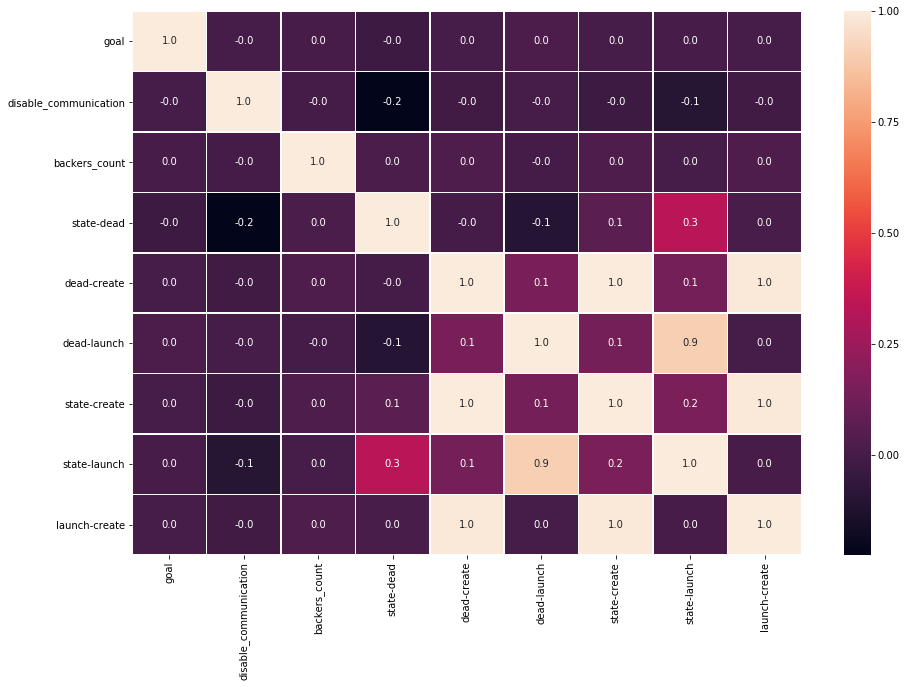

In [89]:
#correlation map
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(x_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

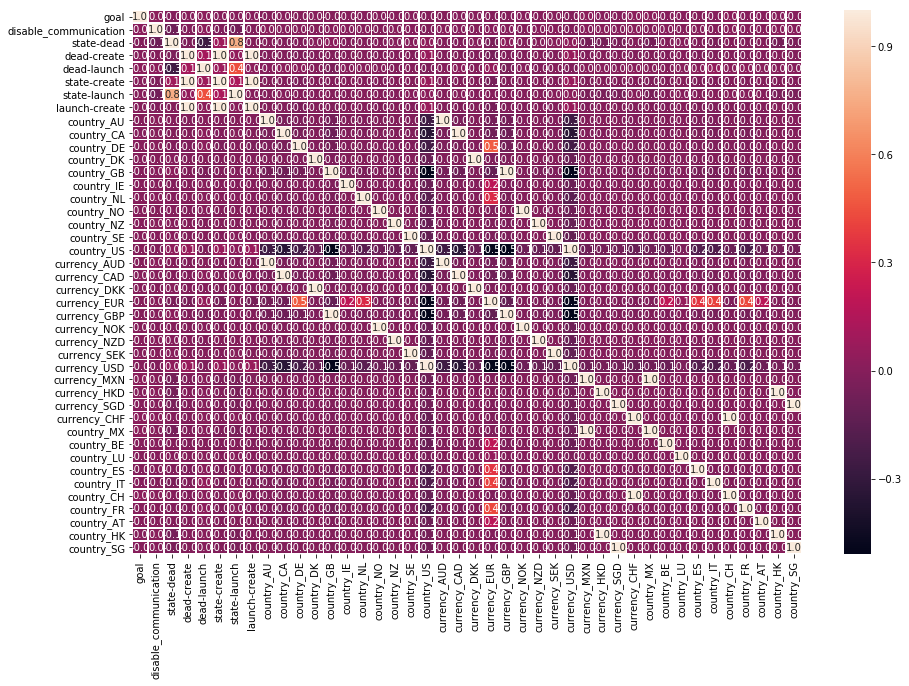

In [115]:
#correlation map
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(x_test.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [116]:
x_train = x_train.drop(['state-create','launch-create','currency_AUD','currency_CAD','currency_DKK','currency_GBP','currency_NOK','currency_NZD','currency_SEK','currency_USD','country_MX','country_HK','country_CH','country_SG'],axis=1)
x_test = x_test.drop(['state-create','launch-create','currency_AUD','currency_CAD','currency_DKK','currency_GBP','currency_NOK','currency_NZD','currency_SEK','currency_USD','country_MX','country_HK','country_CH','country_SG'], axis=1)

In [90]:
x_train = x_train.drop(['country','currency'], axis=1)
x_test = x_test.drop(['country','currency'], axis=1)

In [151]:
x_train = x_train.drop(['state-create','launch-create'], axis=1)

In [152]:
x_train = x_train.drop(['state-launch'], axis=1)

In [153]:
x_train = x_train.drop(['state-dead'], axis=1)

In [154]:
x_test = x_test.drop(['state-create','launch-create'], axis=1)

In [155]:
x_test = x_test.drop(['state-launch'], axis=1)

In [156]:
x_test = x_test.drop(['state-dead'], axis=1)

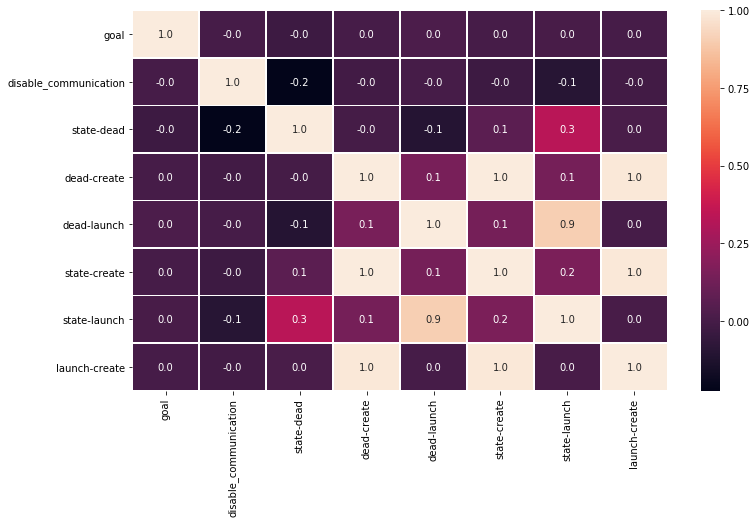

In [189]:
#correlation map
f,ax = plt.subplots(figsize=(12, 7))
sns.heatmap(x_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

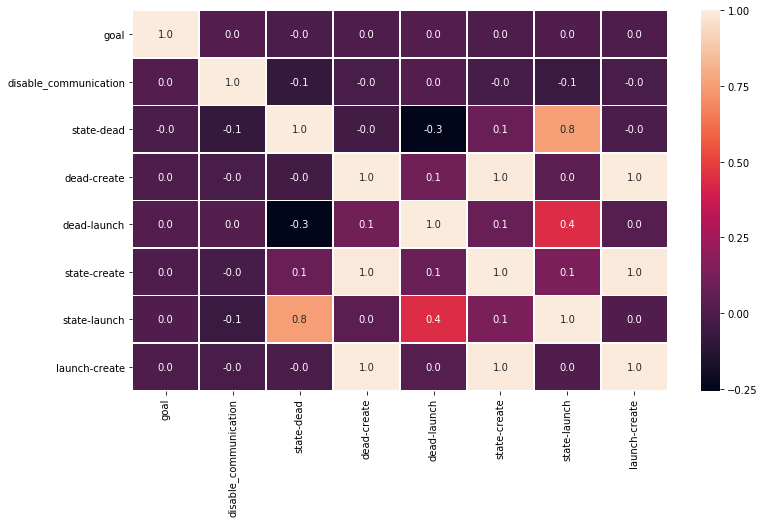

In [190]:
#correlation map
f,ax = plt.subplots(figsize=(12, 7))
sns.heatmap(x_test.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [258]:
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,63465.0,35323.719263,1.206678e+06,1.0,2000.0,6000.0,20000.0,100000000.0
state-dead,63465.0,-203.011250,3.734325e+02,-1705.0,-261.0,0.0,0.0,1152.0
dead-create,63465.0,2009.959663,3.199862e+03,25.0,775.0,1108.0,1761.0,53942.0
dead-launch,63465.0,798.281651,2.740577e+02,24.0,720.0,720.0,840.0,2143.0
state-create,63465.0,1807.014591,3.209971e+03,0.0,717.0,943.0,1622.0,53942.0
state-launch,63465.0,595.329095,4.023874e+02,-9.0,243.0,720.0,721.0,2143.0
launch-create,63465.0,1211.552541,3.181757e+03,0.0,48.0,223.0,900.0,53606.0


In [206]:
x_train['project_id'] = np.log(TrainData['project_id'].str[4:].astype(float))
x_test['project_id'] = np.log(TestData['project_id'].str[4:].astype(float))

In [259]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
goal,108129.0,36726.228833,971902.705156,0.01,2000.0,5000.0,13000.0,100000000.0
state-dead,108129.0,-26.559443,140.624316,-2161.00,0.0,0.0,0.0,7098.0
dead-create,108129.0,1724.943780,2115.191150,24.00,813.0,1133.0,1718.0,46389.0
dead-launch,108129.0,819.150792,311.222368,24.00,720.0,720.0,884.0,2207.0
state-create,108129.0,1698.422098,2119.593339,0.00,795.0,1115.0,1703.0,46389.0
state-launch,108129.0,792.601541,327.959523,0.00,719.0,720.0,844.0,8515.0
launch-create,108129.0,905.650233,2091.906213,0.00,72.0,245.0,781.0,45691.0


# Training The Model

In [94]:
xgb_clf = xgb.XGBClassifier(n_estimators=800, seed=1729, max_depth=4)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=800, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1729, silent=True, subsample=1)

In [95]:
pred = xgb_clf.predict(x_train)

In [96]:
accuracy_score(y_train, pred)

0.8885682841790824

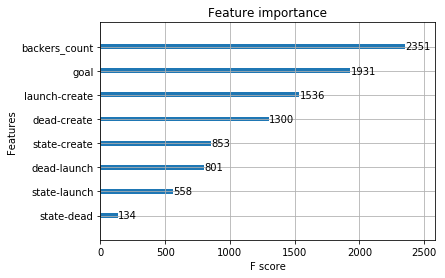

In [97]:
xgb.plot_importance(xgb_clf)

In [98]:
predictions = xgb_clf.predict(x_test)

ValueError: feature_names mismatch: ['goal', 'disable_communication', 'backers_count', 'state-dead', 'dead-create', 'dead-launch', 'state-create', 'state-launch', 'launch-create'] ['goal', 'disable_communication', 'state-dead', 'dead-create', 'dead-launch', 'state-create', 'state-launch', 'launch-create']
expected backers_count in input data

In [274]:
sub = pd.DataFrame({'project_id': pro_id, 'final_status': predictions})
filename = 'submissison.csv'
sub.to_csv(filename, index=False, columns=['project_id', 'final_status'])
FileLink(filename) 

/home/sparsh/Desktop/Challenges/Data Science Hiring Challenge/Predict project's success/submissison.csv

In [ ]:
#0.69079 lb only using created features all of them not deleted anyone of them using all of them 
# xgb_clf = xgb.XGBClassifier(n_estimators=800, seed=1729, max_depth=4)

In [361]:
# from sklearn.cross_validation import train_test_split
# from sklearn.metrics import roc_auc_score
# from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
# from sklearn.feature_selection import SelectFromModel

In [362]:
# ## # Train Model
# # classifier from xgboost
# clf1 = AdaBoostClassifier(n_estimators=600, random_state=5)
# clf2 = ExtraTreesClassifier(n_estimators=600, n_jobs=-1,max_depth=4)
# clf3 = xgb.XGBClassifier(n_estimators=600, nthread=-1, max_depth = 4, seed=1729)
# clf4 = GradientBoostingClassifier(n_estimators=600,max_depth=5)
# eclf = VotingClassifier(estimators=[('ab', clf1), ('etc', clf2), ('xgb', clf3),('gbc', clf4)], weights=[1,1,1,1], voting='soft')
# eclf.fit(x_train, y_train)

VotingClassifier(estimators=[('ab', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=600, random_state=5)), ('etc', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
      ...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 1, 1, 1])

In [363]:
# pred = eclf.predict(x_train)
# accuracy_score(y_train, pred)

0.705620138908156

In [364]:
# predictions = eclf.predict(x_test)

In [365]:
# sub = pd.DataFrame({'project_id': pro_id, 'final_status': predictions})
# filename = 'submissison.csv'
# sub.to_csv(filename, index=False, columns=['project_id', 'final_status'])
# FileLink(filename) 

/home/sparsh/Desktop/Challenges/Data Science Hiring Challenge/Predict project's success/submissison.csv

In [374]:
TrainData.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-29 00:09:00,2009-05-29 00:15:21,2009-04-29 00:09:55,2009-04-29 00:58:50,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 11:38:00,2009-05-31 11:45:17,2009-05-01 11:38:34,2009-05-01 12:22:21,1,0


In [381]:
x_train.head(2)

,goal,disable_communication,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,20.0,False,0.0,203.0,203.0,203.0,203.0,0.0
1,300.0,False,0.0,407.0,403.0,408.0,404.0,4.0


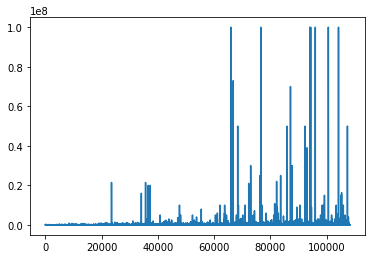

In [387]:
plt.plot(x_train['goal'])
plt.show()

In [412]:
y_train[x_train['disable_communication'] == True ]

5814      0
6296      0
7872      0
8292      0
8981      0
10078     0
10080     0
10450     0
11528     0
11770     0
18433     0
24784     0
26594     0
26708     0
27518     0
29359     0
32559     0
35825     0
35928     0
42508     0
43344     0
47995     0
49530     0
50059     0
59462     0
62925     0
63108     0
63707     0
64415     0
64437     0
         ..
104467    0
104506    0
104512    0
104519    0
104556    0
104638    0
104646    0
105185    0
105260    0
105429    0
105465    0
105547    0
105597    0
105661    0
106024    0
106452    0
106479    0
106744    0
106936    0
107060    0
107182    0
107212    0
107325    0
107374    0
107504    0
107615    0
107622    0
107742    0
107869    0
108040    0
Name: final_status, Length: 323, dtype: int64

In [388]:
y_train.value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

In [394]:
x = x_train[y_train == 1]

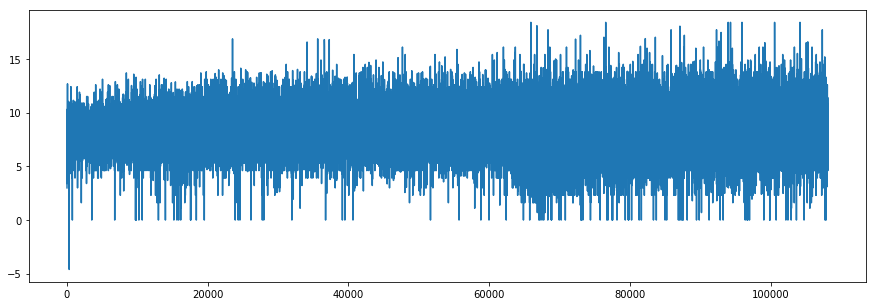

In [420]:
plt.figure(figsize= (15,5))
plt.plot(range(x_train.shape[0]),np.log(x_train['goal']))
plt.show()

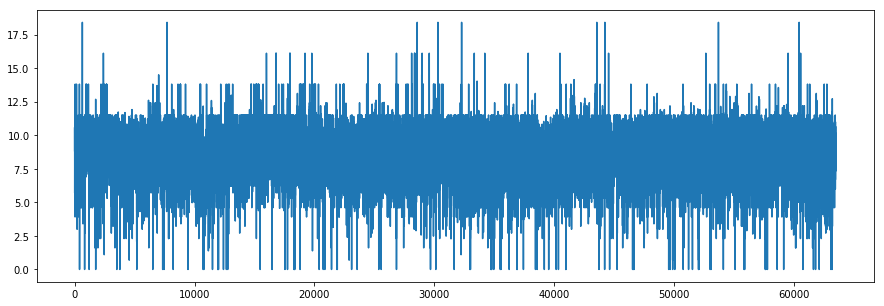

In [421]:
plt.figure(figsize= (15,5))
plt.plot(range(x_test.shape[0]),np.log(x_test['goal']))
plt.show()

In [501]:
x_train[np.log(x_train['goal']) < 0]

,goal,disable_communication,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
317,0.01,False,0.0,215.0,215.0,216.0,215.0,0.0


In [503]:
y_train[np.log(x_train['goal']) < 0]

317    1
Name: final_status, dtype: int64

In [443]:
x_test[np.log(x_test['goal']) < 0]

,goal,disable_communication,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create


In [504]:
y_train = y_train[np.log(x_train['goal']) >= 0]

In [505]:
x_train = x_train[np.log(x_train['goal']) >= 0]

In [506]:
x_train.shape

(108128, 8)

In [507]:
y_train.shape

(108128,)

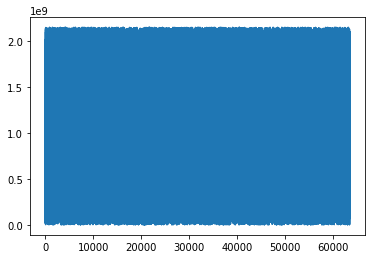

In [78]:
plt.plot((TestData['project_id'].str[4:].astype(float)))
plt.show()

In [79]:
TestData['project_id'].str[4:].astype(float)

0        9.174937e+08
1        1.664902e+09
2        9.251251e+08
3        1.427645e+09
4        1.714249e+09
5        9.947443e+08
6        3.664718e+08
7        1.686645e+09
8        1.009612e+09
9        7.749472e+08
10       7.517366e+08
11       5.464871e+08
12       1.841856e+08
13       1.473771e+07
14       1.709731e+09
15       6.773109e+08
16       2.017864e+09
17       2.630538e+08
18       5.153657e+08
19       1.399418e+09
20       1.923573e+09
21       1.835524e+09
22       6.913134e+08
23       1.801491e+09
24       1.370170e+09
25       6.968095e+07
26       6.599135e+07
27       5.338948e+08
28       1.416439e+09
29       1.728612e+09
             ...     
63435    2.098627e+09
63436    1.803682e+09
63437    1.944372e+09
63438    1.751651e+08
63439    1.206848e+09
63440    2.053271e+09
63441    1.170364e+09
63442    1.872083e+09
63443    8.681471e+08
63444    9.679327e+07
63445    2.330408e+08
63446    1.927063e+08
63447    1.648942e+09
63448    4.548551e+08
63449    1

In [100]:
x_train.head()

,goal,disable_communication,backers_count,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,20.0,False,3,0.0,203.0,203.0,203.0,203.0,0.0
1,300.0,False,2,0.0,407.0,403.0,408.0,404.0,4.0
2,30.0,False,0,0.0,239.0,239.0,240.0,239.0,0.0
3,500.0,False,18,0.0,719.0,719.0,720.0,719.0,0.0
4,2000.0,False,1,0.0,719.0,719.0,720.0,719.0,0.0


In [102]:
Y_tr = x_train['backers_count']
X_tr = x_train.drop(['backers_count'], axis=1)

In [136]:
xgb_reg = xgb.XGBRegressor(n_estimators=400, seed=1729, max_depth=4)
xgb_reg.fit(X_tr, Y_tr)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1729, silent=True, subsample=1)

In [137]:
from sklearn.metrics import mean_squared_error
pred_bac = xgb_reg.predict(X_tr)
print(np.sqrt(mean_squared_error(Y_tr, np.round(pred_bac, 0))))

651.103277993


In [138]:
X_test = x_test.copy()
Y_test = xgb_reg.predict(X_test)

In [139]:
X_test['backers_count'] = Y_test

In [140]:
X_test.head()

,goal,disable_communication,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create,backers_count
0,7000.0,False,0.0,1004.0,961.0,1004.0,961.0,43.0,63.792049
1,35000.0,False,0.0,871.0,840.0,871.0,840.0,31.0,124.171104
2,49500.0,False,0.0,888.0,863.0,888.0,863.0,25.0,141.916428
3,40000.0,False,0.0,1126.0,720.0,1126.0,720.0,406.0,354.897217
4,20000.0,False,0.0,1750.0,1037.0,1750.0,1037.0,713.0,236.542160


In [141]:
x_train.head()

,goal,disable_communication,backers_count,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,20.0,False,3,0.0,203.0,203.0,203.0,203.0,0.0
1,300.0,False,2,0.0,407.0,403.0,408.0,404.0,4.0
2,30.0,False,0,0.0,239.0,239.0,240.0,239.0,0.0
3,500.0,False,18,0.0,719.0,719.0,720.0,719.0,0.0
4,2000.0,False,1,0.0,719.0,719.0,720.0,719.0,0.0


In [142]:
X_test = X_test[x_train.columns]

In [143]:
X_test.head()

,goal,disable_communication,backers_count,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,7000.0,False,63.792049,0.0,1004.0,961.0,1004.0,961.0,43.0
1,35000.0,False,124.171104,0.0,871.0,840.0,871.0,840.0,31.0
2,49500.0,False,141.916428,0.0,888.0,863.0,888.0,863.0,25.0
3,40000.0,False,354.897217,0.0,1126.0,720.0,1126.0,720.0,406.0
4,20000.0,False,236.542160,0.0,1750.0,1037.0,1750.0,1037.0,713.0


In [144]:
X_test['backers_count'] = X_test['backers_count'].astype(int)

In [145]:
X_test.head()

,goal,disable_communication,backers_count,state-dead,dead-create,dead-launch,state-create,state-launch,launch-create
0,7000.0,False,63,0.0,1004.0,961.0,1004.0,961.0,43.0
1,35000.0,False,124,0.0,871.0,840.0,871.0,840.0,31.0
2,49500.0,False,141,0.0,888.0,863.0,888.0,863.0,25.0
3,40000.0,False,354,0.0,1126.0,720.0,1126.0,720.0,406.0
4,20000.0,False,236,0.0,1750.0,1037.0,1750.0,1037.0,713.0


In [146]:
xgb_clf = xgb.XGBClassifier(n_estimators=800, seed=1729, max_depth=4)
xgb_clf.fit(x_train, y_train)
pred = xgb_clf.predict(x_train)
accuracy_score(y_train, pred)

0.8885682841790824

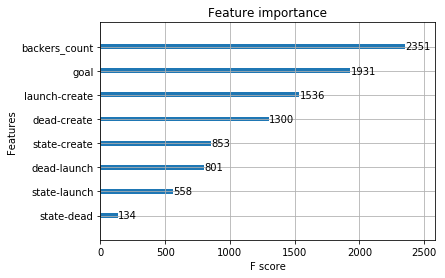

In [147]:
xgb.plot_importance(xgb_clf)

In [148]:
predictions = xgb_clf.predict(X_test)

In [149]:
sub = pd.DataFrame({'project_id': pro_id, 'final_status': predictions})
filename = 'submissison.csv'
sub.to_csv(filename, index=False, columns=['project_id', 'final_status'])
FileLink(filename)

/home/sparsh/Desktop/Challenges/Data Science Hiring Challenge/Predict project's success/submissison.csv

In [45]:
TrainData.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.decomposition import NMF
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
import re
import dill as pickle
from time import time
from datetime import datetime
from unidecode import unidecode

In [84]:
class TopicModeling(object):

    def __init__(self):
        pass

    def clean_documents(self, descriptions):
        documents = [unidecode(document).lower().translate(string.punctuation)
                    for document in descriptions]
        documents = [re.sub(r'\d+', '', doc) for doc in documents]
        return documents

    def get_tf(self, descriptions):
        '''
        INPUT: array of project descriptions
        OUTPUT: count_vectorizer, term_frequency_matrix
        '''
        documents = self.clean_documents(descriptions)
        countvec = CountVectorizer(stop_words='english', tokenizer=word_tokenize,
                   min_df=5, max_df =0.95 ,ngram_range=(1, 2),
                   preprocessor=PorterStemmer().stem)
        word_counts_matrix = countvec.fit_transform(descriptions)

        return countvec, word_counts_matrix

    def get_tfidf(self, descriptions):
        '''
        INPUT: array of project descriptions
        OUTPUT: tfidf_vectorizer, tfidf_matrix
        '''
        documents = self.clean_documents(descriptions)
        tfidfvec = TfidfVectorizer(stop_words='english', tokenizer=word_tokenize,
                   min_df=5, max_df =0.95 ,ngram_range=(1, 2),
                   preprocessor=PorterStemmer().stem)
        tfidf_matrix = tfidfvec.fit_transform(documents)

        return tfidfvec, tfidf_matrix

    def get_nmf_results(self, tfidf_matrix, n_topics=20):
        '''
        INPUT: tfidf_matrix, number of latent topics
        OUTPUT: W matrix, H matrix, nmf
        '''
        nmf = NMF(n_components=n_topics)
        W = nmf.fit_transform(tfidf_matrix)
        H = nmf.components_

        return W, H, nmf

    def get_Wtest(self, full_tf, X_test_d, nmf):
        full_tf_matrix_test = full_tf.transform(X_test_d)
        W_test = nmf.transform(full_tf_matrix_test)

        return W_test, full_tf_matrix_test

    def get_success_pct_per_topic(W,y):
        '''
        Retrieve campaign success percentage by latent topics.
        INPUT: W matrix, y array
        OUTPUT: dataframe of topics and success percentage
        '''
        topic_label = np.apply_along_axis(func1d=np.argmax,axis=1, arr=W)
        dtf = pd.DataFrame()
        dtf['topic'] = topic_label
        dtf['outcome'] = map(lambda x:1 if x else 0, y)
        group = dtf.groupby('topic').sum()
        group['total'] = dtf.groupby('topic').count()
        group['pct'] = group.outcome/group.total

        return group

    def describe_nmf_results(full_tf, H, W,y_train, n_top_words = 10):
        '''
        Retrieve top n words describing NMF latent topics, along with
        corresponding success rates.
        '''
        feature_words = full_tf.get_feature_names()
        top_topic_words = []
        for topic_num, topic in enumerate(H):
            top_words = [feature_words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
            top_topic_words.append([topic_num,top_words])


        nmf_df = pd.DataFrame(top_topic_words, columns=['topic','top_words'])
        group = get_success_pct_per_topic(W_train,y_train)

        mdf = group.merge(nmf_df, left_on='index1', right_on='topic',how='outer')
        return mdf

In [76]:
d = TopicModeling()

In [88]:
data, data2 = d.get_tf((TrainData['desc'][1]))

In [89]:
print(data2)

  (4, 1)	1
  (5, 6)	1
  (6, 1)	1
  (8, 2)	1
  (10, 0)	1
  (11, 3)	1
  (14, 2)	1
  (15, 0)	1
  (17, 6)	1
  (18, 4)	1
  (22, 3)	1
  (23, 3)	1
  (25, 0)	1
  (26, 1)	1
  (28, 7)	1
  (30, 2)	1
  (32, 4)	1
  (37, 5)	1
  (38, 4)	1
  (41, 4)	1
  (44, 4)	1
  (46, 6)	1
  (47, 1)	1
  (50, 0)	1
  (51, 3)	1
  :	:
  (72, 7)	1
  (75, 5)	1
  (92, 3)	1
  (93, 3)	1
  (95, 0)	1
  (96, 1)	1
  (98, 7)	1
  (99, 6)	1
  (102, 1)	1
  (103, 3)	1
  (105, 4)	1
  (108, 7)	1
  (109, 5)	1
  (115, 5)	1
  (117, 1)	1
  (118, 7)	1
  (119, 5)	1
  (121, 4)	1
  (123, 5)	1
  (126, 2)	1
  (128, 4)	1
  (129, 2)	1
  (131, 2)	1
  (132, 1)	1
  (133, 1)	1
